In [1]:
bodtmp <- read.csv('bodytemp.csv', head=TRUE, sep=',')
bodtmp[sample(nrow(bodtmp), 10), ]

,temperature,gender,rate
14,97.5,1,70
111,98.7,2,82
9,97.3,1,69
85,98.0,2,89
59,99.0,1,79
91,98.2,2,69
60,99.0,1,81
119,98.9,2,76
95,98.3,2,80
96,98.4,2,79


In [2]:
bodtmpus <- unstack(bodtmp, temperature~gender)
bodtmpus[sample(nrow(bodtmpus), 10), ]

,X1,X2
19,97.7,98.0
16,97.6,98.0
44,98.5,98.7
27,98.0,98.2
35,98.2,98.4
25,97.9,98.2
22,97.8,98.2
20,97.8,98.0
2,96.7,96.7
43,98.4,98.7


In [3]:
male.data   <- bodtmpus[[1]]
female.data <- bodtmpus[[2]] 

round(mean(male.data), 5)
round(mean(female.data), 5)

[1] 98.10462

[1] 98.39385

In [4]:
mean.precision <- function(data) {
    theta <- 0
    ksi <- 0
    theta[1] <- mean(data)
    sample.size <- length(data)
    theta.zero <- 98.6
    ksi.prior <- 4
    
    k <- 1
    npair <- 1000
    while(k < npair + 1) {
        alpha <- sample.size / 2 + 2
        lambda <- (sample.size / 2 * (theta[k] - theta[1])^2) + 32 * var(data) + 2
        ksi[k] <- rgamma(n=1, alpha, lambda)

        mean <- (sample.size * ksi[k] * theta[1] + theta.zero * ksi.prior) / 
                (sample.size * ksi[k] + ksi.prior)
        std <- sqrt(1 / (sample.size * ksi[k] + ksi.prior))
        theta[k + 1] <- rnorm(n=1, mean, std) 

        k <- k + 1
    }
    beg <- npair / 2 + 1
    end <- npair
    return (list(mean=theta[beg:end], precision=ksi[beg:end]))
}

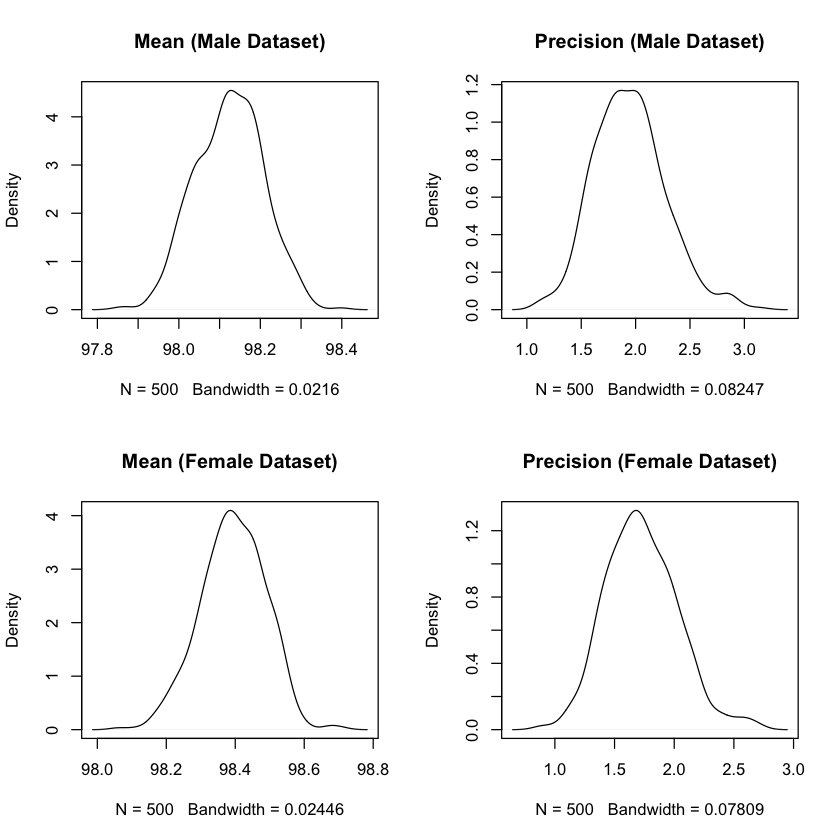

In [5]:
male   <- mean.precision(male.data)
female <- mean.precision(female.data)

par(mfcol=c(2, 2)) 
den.theta.male <- density(male$mean)
den.ksi.male   <- density(male$precision)
den.theta.female <- density(female$mean)
den.ksi.female   <- density(female$precision)
plot(den.theta.male, main='Mean (Male Dataset)')
plot(den.theta.female, main='Mean (Female Dataset)')
plot(den.ksi.male, main='Precision (Male Dataset)')
plot(den.ksi.female, main='Precision (Female Dataset)')

In [6]:
print('Mean Statistics (Male)')
summary(male$mean)
print('Mean Statistics (Female)')
summary(female$mean)

[1] "Mean Statistics (Male)"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  97.85   98.06   98.13   98.12   98.18   98.40 

[1] "Mean Statistics (Female)"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  98.06   98.33   98.40   98.39   98.46   98.71 

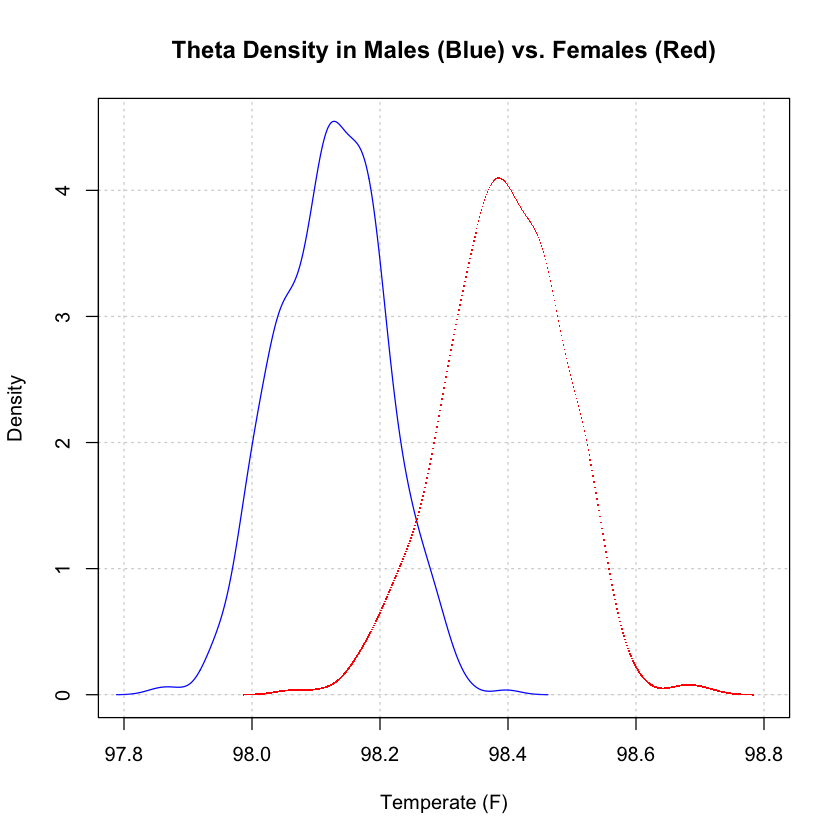

In [7]:
t <- 'Theta Density in Males (Blue) vs. Females (Red)'
plot(den.theta.male, col='blue', sub='', 
     xlim=c(97.8, 98.8), main=t,
     xlab='Temperate (F)', panel.first = grid())
par(new=TRUE)
points(den.theta.female, pch='.', col='red', xlim=c(97.8, 98.8))

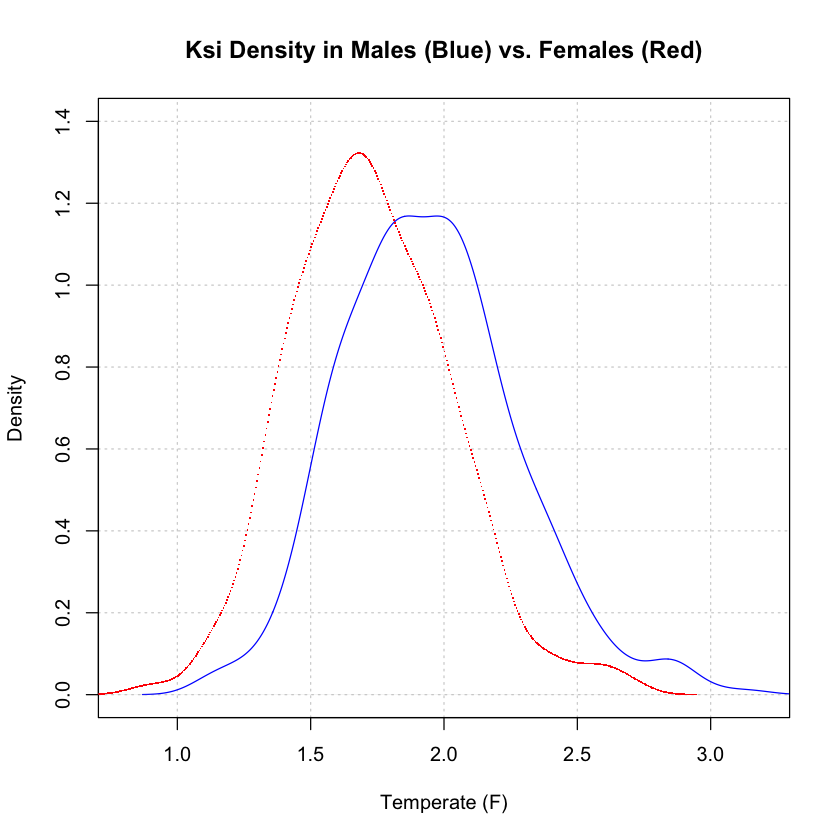

In [8]:
t <- 'Ksi Density in Males (Blue) vs. Females (Red)'
plot(den.ksi.male, col='blue', sub='', 
     ylim=c(0, 1.4), xlim=c(.8, 3.2), main=t,
     xlab='Temperate (F)', panel.first = grid())
par(new=TRUE)
points(den.ksi.female, pch='.', col='red', ylim=c(0, 1.4), xlim=c(.8, 3.2))

In [9]:
print('Precision Statistics (Male)')
summary(male$precision)
print('Precision Statistics (Female)')
summary(female$precision)

[1] "Precision Statistics (Male)"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.117   1.717   1.929   1.946   2.142   3.146 

[1] "Precision Statistics (Female)"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8805  1.5137  1.7172  1.7282  1.9192  2.7124 

In [10]:
round(sd(male$precision), 3)
round(sd(female$precision), 3)

[1] 0.331

[1] 0.301